**Brian Blaylock**  
**March 27, 2018**

# Explore Contingency Table and Fractions Skill Score
## Single Day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os
from matplotlib.path import Path

import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.15
mpl.rcParams['figure.subplot.hspace'] = 0.15
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, get_hrrr_variable
from BB_HRRR.GLM_and_HRRR.GLM_events_HRRR import get_GLM_HRRR_contingency_stats,\
                                                 hit_rate, \
                                                 false_alarm_ratio
from BB_HRRR.HRRR_paths import get_domains
from BB_GOES.get_GLM import get_GLM_file_nearesttime, accumulate_GLM_FAST

Create HRRR map.
Forecasts [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Generate domains and masks.
dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah', 'Colorado', 'Texas', 'Florida'])


In [2]:
m = draw_HRRR_map()

In [12]:
mCO = draw_centermap('Colorado', size=(4,8))

In [33]:
mTX = draw_centermap('Texas', size=(7,10))

In [35]:
mUtah = draw_centermap('Utah', size=(4,8))

In [4]:
Hlat, Hlon = get_hrrr_latlon(DICT=False)

In [17]:
domains = get_domains(add_states=['CO', 'FL', 'TX'], HRRR_specific=True)

In [18]:
domains.keys()

dict_keys(['HRRR', 'West', 'Central', 'East', 'Colorado', 'Florida', 'Texas'])

In [22]:
## Specify the valid Datetime of interest
DATE = datetime(2018, 5, 14, 22) # Mallard Fire
#DATE = datetime(2018, 7, 5, 23)  # Lake Christine 1
#DATE = datetime(2018, 7, 6, 0)    # Lake Christine 2
#DATE = datetime(2018, 7, 17, 6)  # July Storm
#DATE = datetime(2018, 7, 27, 0)  # Missing GLM data

#DATE = datetime(2018, 7, 6, 0) # Test July 1, 2019

In [23]:
# Rerun the entire calculation: 
# return table(a,b,c,d) and grids for Observed and Forecasted Binary.
table = get_GLM_HRRR_contingency_stats(DATE)

(1/7) Get GLM Events. 2018-05-14 22:00:00
-->> Accumulate GLM FAST MP: 20.0%
Got 180 of 180 expected files.
Total Events: 2,338,503
(2/7) Get HRRR Data.
-->> Accumulate GLM FAST MP: 45.0%(3/7) Filter GLM.
(4/7) Put GLM on HRRR grid.
In-HRRR Events: 1,071,362
      1,071,362 events in HRRR
         66,134 events in West
        325,528 events in Central
        301,341 events in East
          7,965 events in Utah
         22,536 events in Colorado
         85,559 events in Texas
         20,329 events in Florida
(5/7) Bloat GLM data with spatial filter.
(6/7) Generate binary grids.
(7/7) Compute contingency table for each subdomain.
    Stats for HRRR
    Stats for West
    Stats for Central
    Stats for East
    Stats for Utah
    Stats for Colorado
    Stats for Texas
    Stats for Florida
(FIN)


In [24]:
a, b, c, d = np.array(table['table']['HRRR'])[:,14]
hit_rate(a, b, c, d), false_alarm_ratio(a, b, c, d)

(0.2735276351555421, 0.670463021923042)

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


Red contour is F01, Blue contour if F18


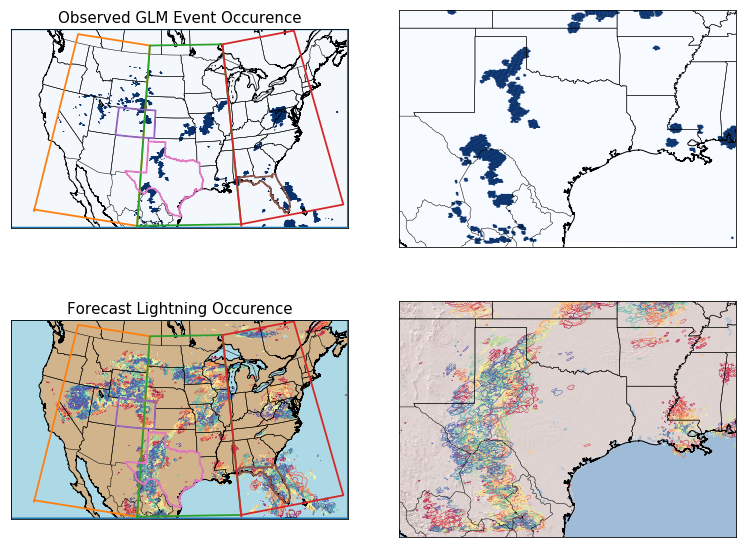

In [36]:
cmap = mpl.cm.get_cmap('Spectral')
rgba = cmap(np.linspace(0,1,18))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(13,10))

#Zoomed map
m2 = mTX

plt.sca(ax1)
plt.title('Observed GLM Event Occurence')
m.pcolormesh(Hlon, Hlat, table['Observed Binary'], latlon=True, cmap='Blues', alpha=.3)
m.drawlsmask(land_color='tan',ocean_color='lightblue',lakes=True)
for DOM in domains:
    m.plot(domains[DOM]['lon'], domains[DOM]['lat'], latlon=True) 
m.drawcoastlines()
m.drawstates()
m.drawcountries()

plt.sca(ax2)
m2.pcolormesh(Hlon, Hlat, table['Observed Binary'], latlon=True, cmap='Blues', alpha=.3)
m2.drawcoastlines()
m2.drawstates()
m2.drawcountries()

for i, F in enumerate(table['Forecast Binary']):
    plt.sca(ax3)
    m.contour(Hlon, Hlat, F, levels=1, colors=[rgba[i]], latlon=True, linewidths=.5)
    plt.sca(ax4)
    m2.contour(Hlon, Hlat, F, levels=1, colors=[rgba[i]], latlon=True, linewidths=.5)

plt.sca(ax3)
plt.title('Forecast Lightning Occurence')
m.drawlsmask(land_color='tan',ocean_color='lightblue',lakes=True)
for DOM in domains:
    m.plot(domains[DOM]['lon'], domains[DOM]['lat'], latlon=True) 
m.drawcoastlines()
m.drawstates()
m.drawcountries()

plt.sca(ax4)    
m2.arcgisimage(service='World_Shaded_Relief', verbose=False)
m2.drawcoastlines()
m2.drawstates()
m2.drawcountries()

print('Red contour is F01, Blue contour if F18')

# Single Datetime: Hit Rate/ False Alarm Ratio

In [15]:
def get_GLM_HRRR_stats_day(DATE, DOMAIN, verbose=True):
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_contingency_table'
    FILE = '/%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, DATE.month, DATE.hour)

    data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
    # NOTE: Set encoding to 'UTF-8' so the date doesn't return as bytes

    if verbose:
        print(data.dtype.names)
    
    # Get the data from the line that cooresponds to the date requested
    line = data[DATE.day-1]

    # Double check that the line we got is the date requested
    if datetime.strptime(line[0], '%Y-%m-%d %H:%M:%S') != DATE:
        print('WARNING: Date of this line does not match the requested DATE')
        print('Grabbed date ', line[0])
    
    if verbose:
        #number of flashes
        num_flashes = int(line[1])
        print('Got {:,} events in {:} domain ({:} of {:} files).'.format(num_flashes, DOMAIN, line[2], line[3]))
    
    return line

def get_GLM_HRRR_FSS_day(DATE, DOMAIN, radius, verbose=True):
    DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/GLM_and_HRRR/HRRR_GLM_Fractions_Skill_Score_r%02d/' % radius
    FILE = '%s/%s_2018_m%02d_h%02d.csv' % (DOMAIN, DOMAIN, DATE.month, DATE.hour)

    data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None, encoding='UTF-8')
    # NOTE: Set encoding to 'UTF-8' so the date doesn't return as bytes

    if verbose:
        print(data.dtype.names)
    
    # Get the data from the line that cooresponds to the date requested
    line = data[DATE.day-1]

    # Double check that the line we got is the date requested
    if datetime.strptime(line[0], '%Y-%m-%d %H:%M:%S') != DATE:
        print('WARNING: Date of this line does not match the requested DATE')
        print('Grabbed date ', line[0])
    
    if verbose:
        #number of flashes
        num_flashes = int(line[1])
        print('Got {:,} events in {:} domain ({:} of {:} files).'.format(num_flashes, DOMAIN, line[2], line[3]))
    
    return line


In [39]:
FSS = [get_GLM_HRRR_FSS_day(DATE, DOMAIN, r, verbose=False) for r in [5,10,20,40]]

In [41]:
FSS

[('2018-05-14 22:00:00', 0.7839, 0.6379, 0.5244, 0.5722, 0.5335, 0.45, 0.4627, 0.4717, 0.4008, 0.3388, 0.3662, 0.3387, 0.5073, 0.4662, 0.5253, 0.5513, 0.4618, 0.4763),
 ('2018-05-14 22:00:00', 0.8409, 0.7206, 0.5909, 0.6509, 0.6006, 0.52, 0.5412, 0.5454, 0.4565, 0.3965, 0.4152, 0.3941, 0.5656, 0.5196, 0.5737, 0.6175, 0.5309, 0.5358),
 ('2018-05-14 22:00:00', 0.9042, 0.845, 0.71, 0.7693, 0.7181, 0.6436, 0.6663, 0.6684, 0.551, 0.5054, 0.5149, 0.5107, 0.6463, 0.5965, 0.6357, 0.7238, 0.6487, 0.6279),
 ('2018-05-14 22:00:00', 0.9587, 0.9429, 0.8093, 0.8749, 0.8448, 0.7898, 0.8189, 0.8113, 0.7239, 0.7074, 0.6841, 0.688, 0.7323, 0.6876, 0.7262, 0.8531, 0.782, 0.788)]

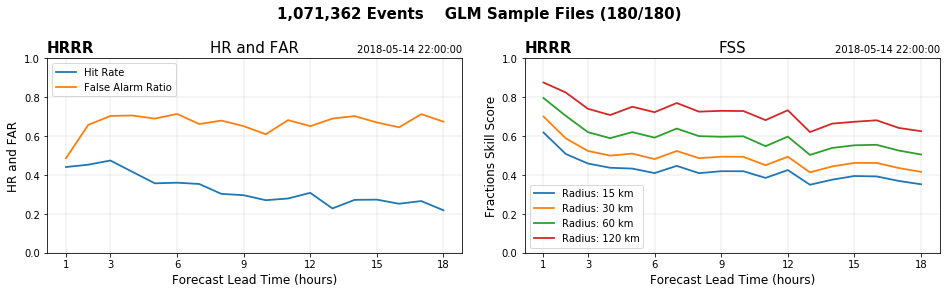

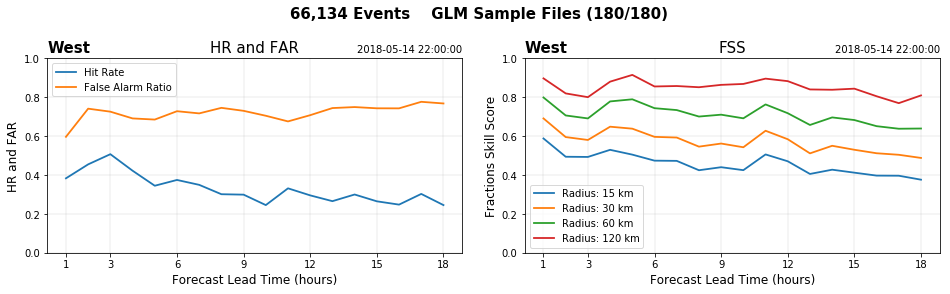

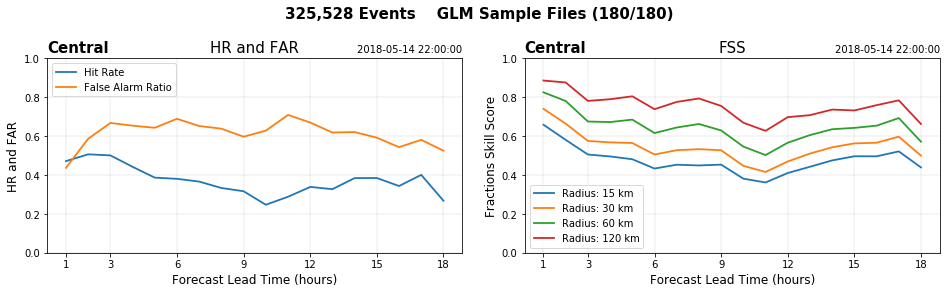

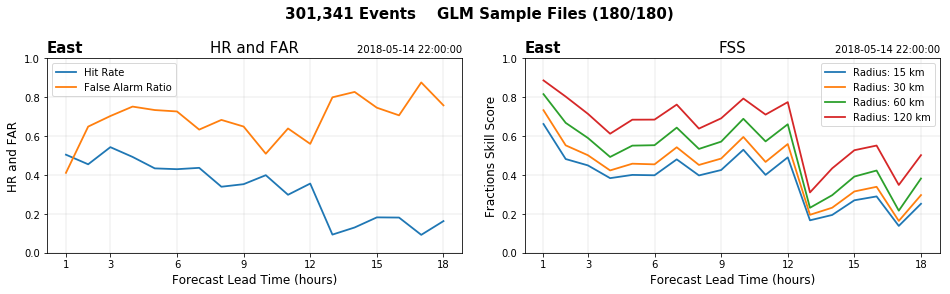

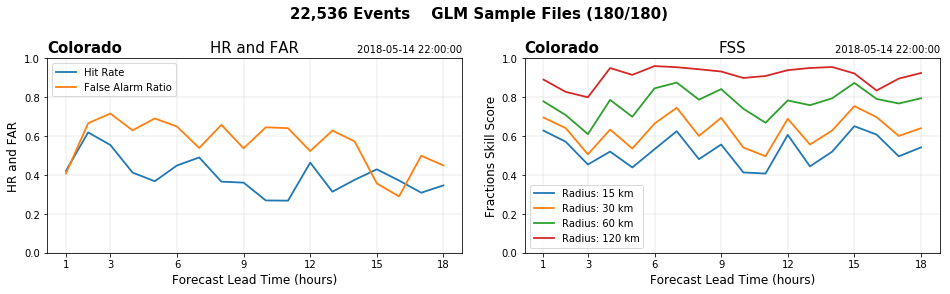

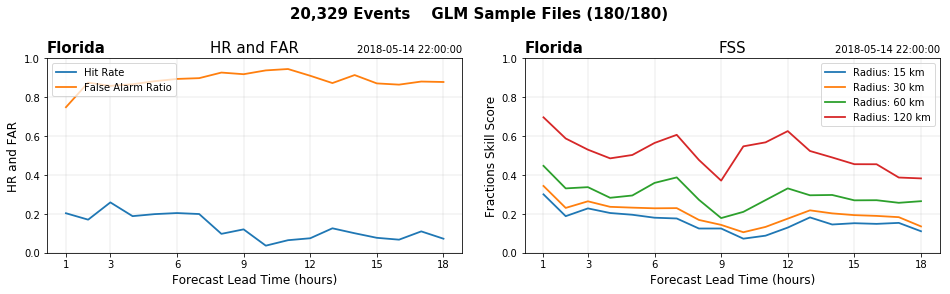

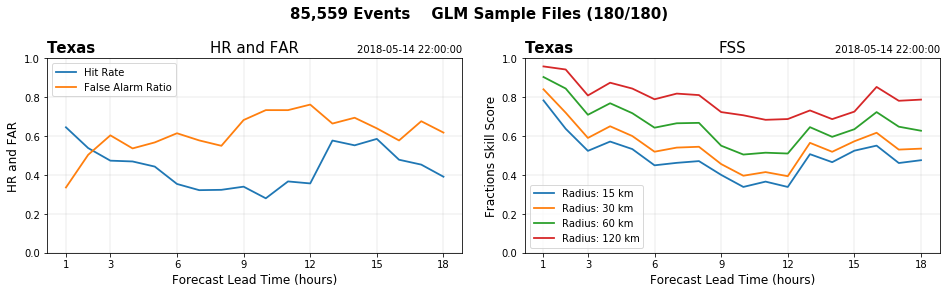

In [42]:
radii = [5, 10, 20, 40] # For FSS scores files available


for DOMAIN in domains:
    line = get_GLM_HRRR_stats_day(DATE, DOMAIN, verbose=False)

    fix, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))

    events = int(line['GLM_Event_COUNT'])
    files = line['NUM_FILES']
    expected = line['EXPECTED_FILES']
    plt.suptitle('{:,} Events    GLM Sample Files ({:}/{:})'.format(events, files, expected))
    
    plt.sca(ax1)
    A = np.array([line['F%02d_A' % (i)] for i in range(1,19)])
    B = np.array([line['F%02d_B' % (i)] for i in range(1,19)])
    C = np.array([line['F%02d_C' % (i)] for i in range(1,19)])
    D = np.array([line['F%02d_D' % (i)] for i in range(1,19)])

    hitRate = hit_rate(A, B, C, D)
    falseAlarmRatio = false_alarm_ratio(A, B, C, D)

    plt.plot(range(1,19), hitRate, label='Hit Rate')
    plt.plot(range(1,19), falseAlarmRatio, label='False Alarm Ratio')
    plt.xlabel('Forecast Lead Time (hours)')
    plt.ylabel('HR and FAR')
    plt.ylim([0,1])
    plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18])
    
    plt.title(DOMAIN, loc='left', fontweight='semibold')
    plt.title("HR and FAR")
    plt.title(DATE, loc='right', fontsize=10)
    
    plt.grid()
    plt.legend(loc=2)
    
    plt.sca(ax2)
    FSS = [get_GLM_HRRR_FSS_day(DATE, DOMAIN, r, verbose=False) for r in radii]

    for fss, r in zip(FSS, radii):
        values = [fss['F%02d_FSS' % h] for h in range(1,19)]
        plt.plot(range(1,19), values, label='Radius: %s km' % (r*3))

    plt.xticks(range(1,19))

    plt.legend()
    plt.grid()

    plt.xlabel('Forecast Lead Time (hours)')
    plt.ylabel('Fractions Skill Score')
    plt.ylim([0,1])
    plt.xticks([1,3,6,9,12,15,18], [1,3,6,9,12,15,18])
    plt.title(DOMAIN, loc='left', fontweight='semibold')
    plt.title('FSS')
    plt.title(DATE, loc='right', fontsize=10)
    
    plt.subplots_adjust(top=0.8)
    SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/GLM_and_HRRR/stats_single_time/'
    if not os.path.exists(SAVEDIR):
            os.makedirs(SAVEDIR)
    plt.savefig(SAVEDIR+'%s_%s' % (DATE.strftime('%Y-%m-%d_%H%M'), DOMAIN))

# Percentage of Area with Forecasted LTNG and Observed GLM Events 

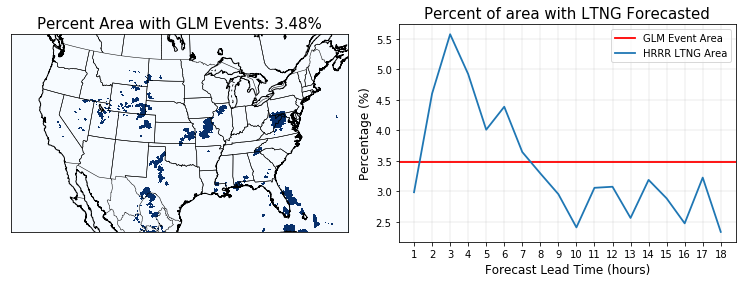

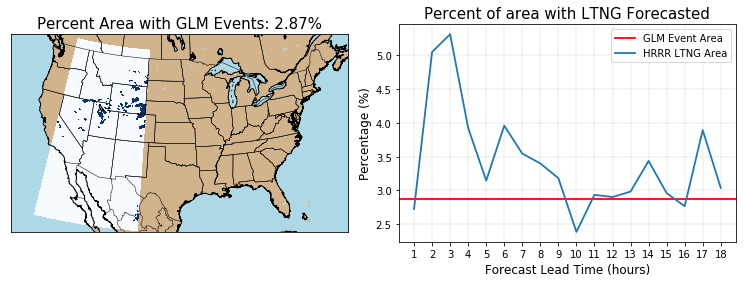

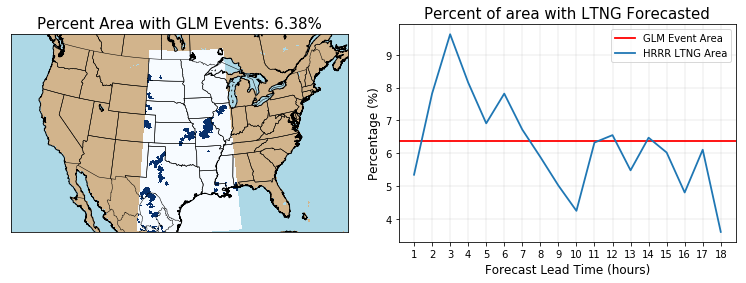

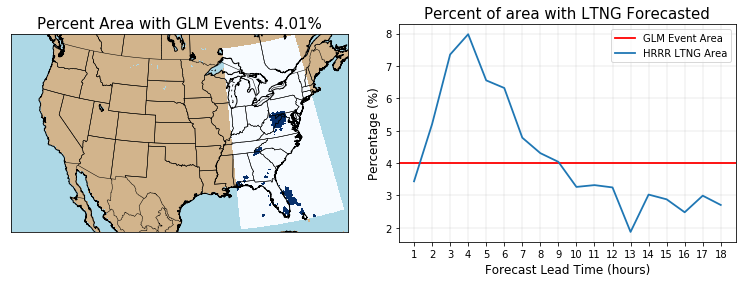

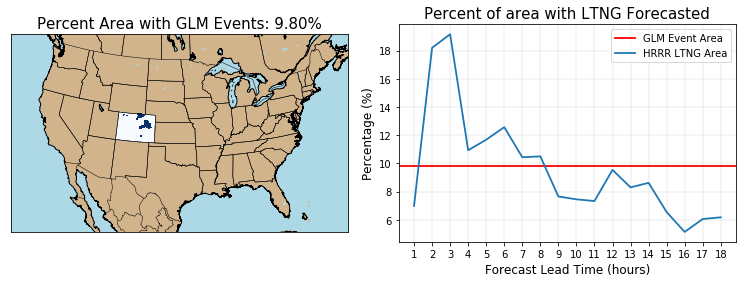

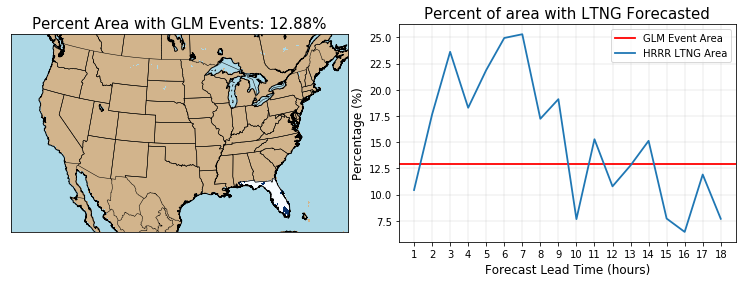

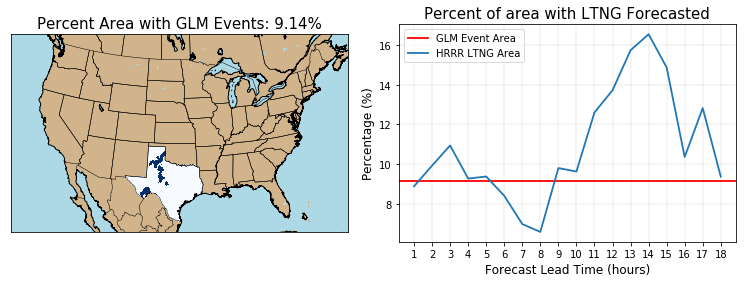

In [38]:
for DOMAIN in domains:
    total_DOMAIN_grid_points = np.sum(np.invert(domains[DOMAIN]['mask']))

    masked_array = np.ma.array(table['Observed Binary'], mask=domains[DOMAIN]['mask'])

    points_with_GLM= np.sum(masked_array)
    points_without_GLM = np.sum(np.invert(masked_array))
    
    percentage_with_GLM = points_with_GLM/total_DOMAIN_grid_points
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    plt.sca(ax1)
    plt.title('Percent Area with GLM Events: %.2f%%' % (percentage_with_GLM*100))
    m.pcolormesh(Hlon, Hlat, masked_array, latlon=True, cmap='Blues')
    m.drawlsmask(land_color='tan',ocean_color='lightblue',lakes=True)
    m.drawstates()
    m.drawcountries()
    m.drawcoastlines()
    
    plt.sca(ax2)
    LTNG_area = []
    for F in table['Forecast Binary']:
        masked_array = np.ma.array(F, mask=domains[DOMAIN]['mask'])
        points_with_LTNG= np.sum(masked_array)
        points_without_LTNG = np.sum(np.invert(masked_array))
        percentage_with_LTNG = points_with_LTNG/total_DOMAIN_grid_points
        LTNG_area.append(percentage_with_LTNG)
    
    plt.axhline(percentage_with_GLM*100, c='r', label='GLM Event Area')
    plt.plot(range(1,19), np.array(LTNG_area)*100, label='HRRR LTNG Area')
    plt.grid()
    #plt.ylim([0,15])
    plt.xticks(range(1,19))
    plt.ylabel('Percentage (%)')
    plt.xlabel('Forecast Lead Time (hours)')
    plt.title('Percent of area with LTNG Forecasted')
    plt.legend()

In [43]:
table = get_GLM_HRRR_contingency_stats(datetime(2018,7,27,0))

(1/7) Get GLM Events. 2018-07-27 00:00:00
**************************************************************
!!!WARNING!!! Missing GLM directory /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA/20180726/23/
**************************************************************
************************************************************
!! WARNING !! There are no GLM files for the period requested!
************************************************************
************************************************************
!! WARNING !! There are no GLM files!
************************************************************

Got 0 of 180 expected files.
